# Forecasting Using ARIMA Models in Python

In this notebook, you will learn to use the powerful ARIMA class models to forecast the future. You will learn how to use the statsmodels package to analyze time series, to build tailored models, and to forecast under uncertainty. How will the stock market move in the next 24 hours? How will the levels of CO2 change in the next decade? How many earthquakes will there be next year? You will learn to solve all these problems and more.

## Table of Contents

- [Introduction](#intro)
- [Data Preparation for Modeling](#prep)
- [AR, MA and ARMA Models](#arma)
- [Fitting Time Series Models](#fit) (including ARMAX, SARIMAX)
- [Intro to ARIMA models](#arima)
- [Intro to ACF and PACF](#acf)
- [AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion)](#aic)
- [Model diagnostics](#diag)
- [Box-Jenkins method](#box)
- [SARIMA - Seasonal ARIMA Models](#sarima)
- [Automation and saving](#auto)
- [SARIMA and Box-Jenkins](#sbox)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path = "data/dc29/"

---
<a id='intro'></a>

<img src="images/ts3_001.png" alt="" style="width: 800px;"/>

<img src="images/ts3_002.png" alt="" style="width: 800px;"/>

<img src="images/ts3_003.png" alt="" style="width: 800px;"/>

<img src="images/ts3_004.png" alt="" style="width: 800px;"/>

<img src="images/ts3_005.png" alt="" style="width: 800px;"/>

<img src="images/ts3_006.png" alt="" style="width: 800px;"/>

<img src="images/ts3_007.png" alt="" style="width: 800px;"/>

<img src="images/ts3_008.png" alt="" style="width: 800px;"/>


## Exploration

In this exercise you will kick off your journey to become an ARIMA master by loading and plotting a time series.

You will be exploring a dataset of monthly US candy production between 1972 and 2018.

Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year.

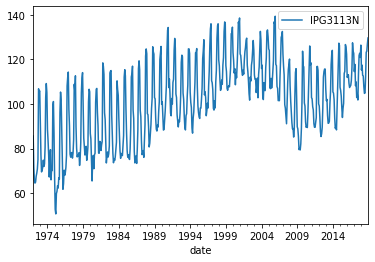

In [2]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd

# Load in the time series
candy = pd.read_csv(path+'candy_production.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax
fig, ax = plt.subplots()
candy.plot(ax=ax)
plt.show();

Can you tell whether this is a stationary time series or not? How does it change throughout the year and across many years?

In [3]:
candy.head()

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


## Train-test splits

In this exercise you are going to take the candy production dataset and split it into a train and a test set. The reason to do this is so that you can test the quality of your model fit when you are done.

Split the time series into train and test sets by slicing with datetime indexes. Take the train set as everything up to the end of 2006 and the test set as everything from the start of 2007.

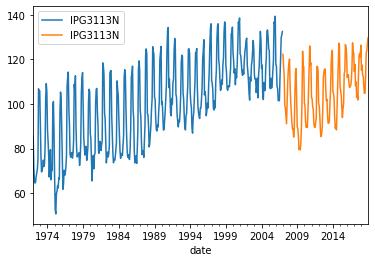

In [4]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show();

Take a look at the plot, do you think that you yourself could predict what happens after 2006 given the blue training set. What happens to the long term trend and the seasonal pattern?

## Is it stationary

Identifying whether a time series is stationary or non-stationary is very important. If it is stationary you can use `ARMA models` to predict the next values of the time series. If it is non-stationary then you cannot use `ARMA models`, however, as you will see in the next lesson, you can often transform non-stationary time series to stationary ones.

In this exercise you will examine some stock and earthquake data sets in order to identify which are ready for ARMA modeling, and which will need further work to make them stationary.

### Question 1

The DataFrame, `df1` is a time series of Amazon stock close price.

Using the console, make a quick plot of this DataFrame using the DataFrame's `.plot()` method and using `plt.show()` to display the plot.

Is `df1`, the stock close price, stationary?

Possible Answers
- No, because df1 has a trend. (correct)
- No, because in df1, the variance changes with time.
- No, in df1, the dynamics change with time.
- Yes, df1 appears to be.

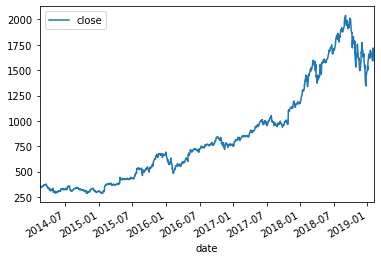

In [5]:
df1 = pd.read_csv(path+'df1.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax
fig, ax = plt.subplots()
df1.plot(ax=ax)
plt.show();

### Question2 

The DataFrame, `df2` is a time series of the return (percentage increase of price per day) of Amazon stock.

Make a plot of `df2`. Is `df2`, the stock return, stationary?

Possible Answers
- No, because df2 has a trend.
- No, because in df2, the variance changes with time. (correct)
- No, in df2, the dynamics change with time.
- Yes, df2 appears to be.

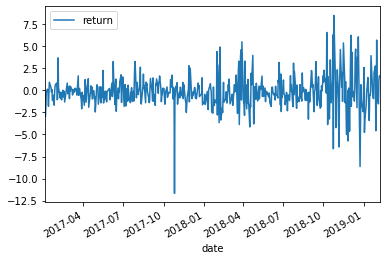

In [6]:
df2 = pd.read_csv(path+'df2.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax
fig, ax = plt.subplots()
df2.plot(ax=ax)
plt.show();

### Question 3

The DataFrame, `df3` is a time series showing the number of major earthquakes per year (earthquakes of magnitude 7.0 or greater). Using the console, make a quick plot of this DataFrame.

Make a plot of `df3`. Is `df3`, the number of major earthquakes per year, stationary?

Possible Answers
- No, because df3 has a trend.
- No, because in df3, the variance changes with time.
- No, in df3, the dynamics change with time.
- Yes, df3 appears to be. (correct)

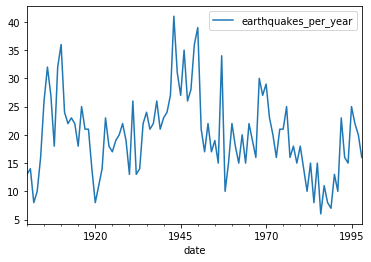

In [7]:
df3 = pd.read_csv(path+'df3.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax
fig, ax = plt.subplots()
df3.plot(ax=ax)
plt.show();

You can't see any trend, or any obvious changes in variance, or dynamics. This time series looks stationary.

---
<a id='prep'></a>

## Data Preparation for Modeling

## Making time series stationary

### The augmented Dicky-Fuller test 
Tests for trend non-stationarity, Null hypothesis is time series is non-stationary.

<img src="images/ts3_009.png" alt="" style="width: 800px;"/>

<img src="images/ts3_010.png" alt="" style="width: 800px;"/>

<img src="images/ts3_011.png" alt="" style="width: 800px;"/>

<img src="images/ts3_012.png" alt="" style="width: 800px;"/>


## Augmented Dicky-Fuller

In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to `test for stationarity`. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!

The earthquakes DataFrame has been loaded in for you as earthquake.

In [8]:
earthquake = pd.read_csv(path+'earthquakes.csv', 
            index_col='date',
            parse_dates=True)
earthquake.head()

,Year,earthquakes_per_year
date,,
1900-01-01,1900,13.0
1901-01-01,1901,14.0
1902-01-01,1902,8.0
1903-01-01,1903,10.0
1904-01-01,1904,16.0


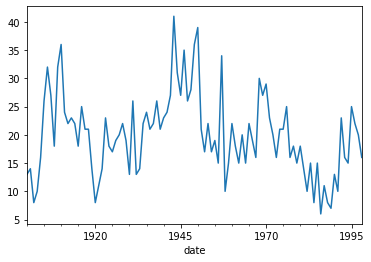

In [9]:
fig, ax = plt.subplots()
earthquake['earthquakes_per_year'].plot(ax=ax)
plt.show();

In [10]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.183192251191782
0.02097842525600371
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


`You can reject the null hypothesis that the time series is non-stationary`. Therefore it is stationary. You probably could have intuited this from looking at the graph or by knowing a little about geology. The time series covers only about 100 years which is a very short time on a geological time scale.

## Taking the difference

In this exercise, you will to prepare a time series of the population of a city for modeling. If you could predict the growth rate of a city then it would be possible to plan and build the infrastructure that the city will need later, thus future-proofing public spending. In this case the time series is fictitious but its perfect to practice on.

You will test for stationarity by eye and use the `Augmented Dicky-Fuller test`, and take the difference to make the dataset stationary.

The DataFrame of the time series has been loaded in for you as city and the adfuller() function has been imported.

In [11]:
city = pd.read_csv(path+'city.csv', 
            index_col='date',
            parse_dates=True)
city.head()

,city_population
date,
1969-09-30,1.000000
1970-03-31,0.960285
1970-09-30,0.957167
1971-03-31,0.946928
1971-09-30,0.987741


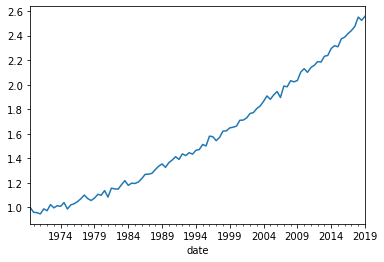

In [12]:
fig, ax = plt.subplots()
city['city_population'].plot(ax=ax)
plt.show();

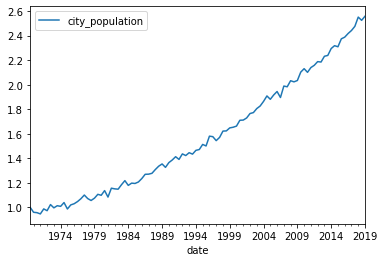

ADF Statistic: 5.297698878151177
p-value: 1.0


In [13]:
# Run the ADF test on the time series
result = adfuller(city['city_population'])

# Plot the time series
fig, ax = plt.subplots()
city.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

Take the `first difference` of city, by applying the .diff() method twice and drop the NaN values.

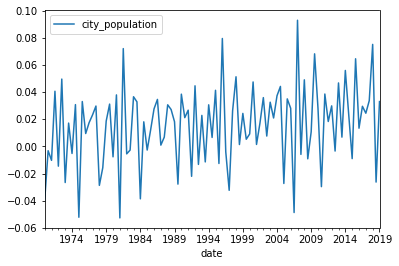

ADF Statistic: -0.8146211646182051
p-value: 0.8147894381484799


In [14]:
# Calculate the first difference of the time series
city_stationary = city.diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

Take the `second difference` of city, by applying the .diff() method twice and drop the NaN values.

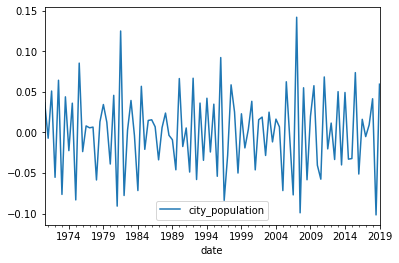

ADF Statistic: -6.433646032918747
p-value: 1.6734498510399825e-08


In [15]:
# Calculate the second difference of the time series
city_stationary = city.diff().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

A p-value of 0.000000016 is very significant! `This time series is now stationary and ready for modeling`!

## Other tranforms

`Differencing should be the first transform you try to make a time series stationary`. But sometimes it isn't the best option.

A classic way of transforming stock time series is the `log-return of the series`. This is calculated as follows:

<img src="images/ts3_013.png" alt="" style="width: 400px;"/>

The Amazon stock time series has already been loaded for you as amazon. You can calculate the log-return of this DataFrame by substituting: 
```
yt→ amazon
yt−1→ amazon.shift(1)
log()→ np.log()
```
In this exercise you will compare the log-return transform and the first order difference of the Amazon stock time series to find which is better for making the time series stationary.

In [16]:
amazon = pd.read_csv(path+'amazon.csv', 
            index_col='date',
            parse_dates=True)
amazon.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


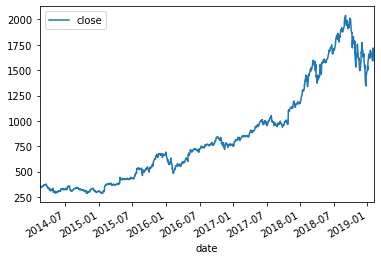

In [17]:
# Plot the differenced time series
fig, ax = plt.subplots()
amazon.plot(ax=ax)
plt.show()

In [18]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff().dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

(-7.203579488811244, 2.331271725487179e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)


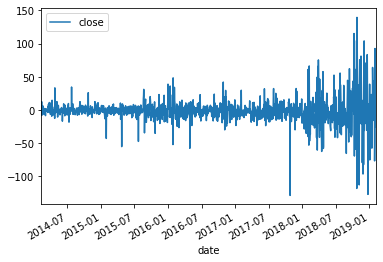

In [19]:
# Plot the differenced time series
fig, ax = plt.subplots()
amazon_diff.plot(ax=ax)
plt.show()

(-34.91574853605969, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6245.723147672197)


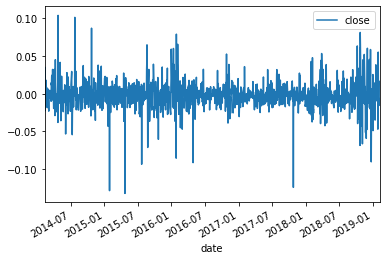

In [20]:
# Calculate log-return and drop nans
amazon_log = np.log(amazon/amazon.shift(1)).dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

# Plot the differenced time series
fig, ax = plt.subplots()
amazon_log.plot(ax=ax)
plt.show()

Notice that both the differenced and the log-return transformed time series have a small p-value, but the `log transformed time series has a much more negative test statistic`. This means the log-return tranformation is better.

---
<a id='arma'></a>

## AR, MA and ARMA Models

<img src="images/ts3_014.png" alt="" style="width: 800px;"/>

<img src="images/ts3_015.png" alt="" style="width: 800px;"/>

<img src="images/ts3_016.png" alt="" style="width: 800px;"/>

<img src="images/ts3_017.png" alt="" style="width: 800px;"/>

<img src="images/ts3_018.png" alt="" style="width: 800px;"/>

<img src="images/ts3_020.png" alt="" style="width: 800px;"/>

<img src="images/ts3_019.png" alt="" style="width: 800px;"/>


## Model order

When fitting and working with AR, MA and ARMA models `it is very important to understand the model order`. You will need to pick the model order when fitting. Picking this correctly will give you a better fitting model which makes better predictions. So in this section you will practice working with model order.

In [21]:
from statsmodels.tsa.arima_process import arma_generate_sample

ar_coefs = [1, 0.4, -0.1]
ma_coefs = [1, 0.2]

y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100)

### Question 1

Print `ar_coefs` and `ma_coefs` which are available in the console. If you were to use these in the `arma_generate_sample()` function what would be the order of the data?

Possible Answers
- ARMA(2,1) correct
- ARMA(3,2)
- ARMA(1,2)
- ARMA(2,3)

### Question 2

Print `ar_coefs` and `ma_coefs` which are available in the console. If you were to use these in the `arma_generate_sample()` function what would the lag-1 AR coefficient?

Possible Answers
- 0.4
- 0.2
- -0.4 correct
- -0.2

### Question 3

Which of these models is equivalent to an AR(1) model?

Possible Answers
- ARMA(1,1)
- ARMA(1,0) correct
- MA(1)
- ARMA(0,1)

Note that setting either p or q to zero means we get a simpler model, either a AR or MA model.

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

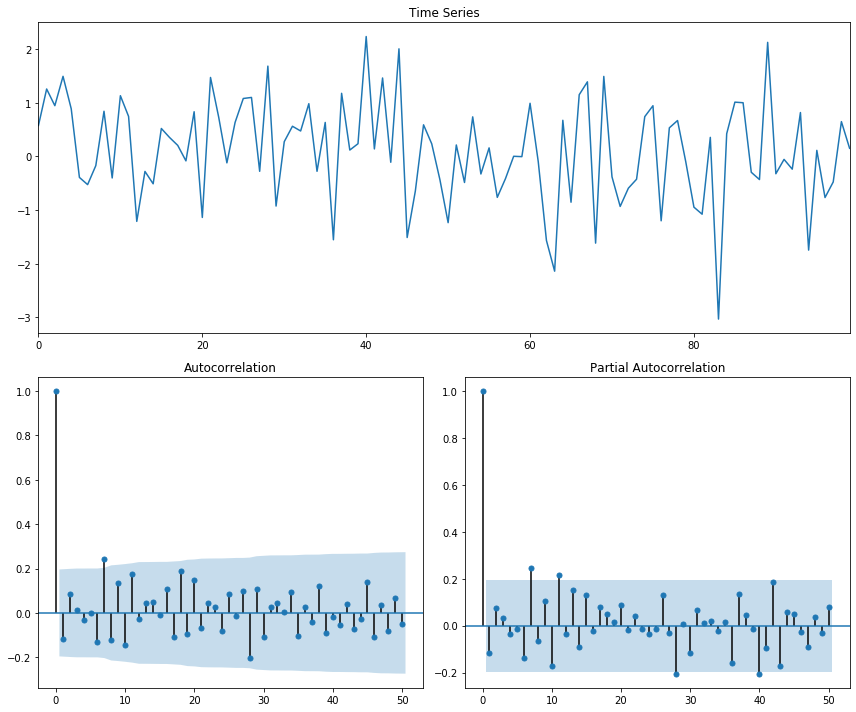

In [23]:
plotds(y)

## Generating ARMA data

In this exercise you will generate 100 days worth of AR/MA/ARMA data. Remember that in the real world applications, this data could be changes in Google stock prices, the energy requirements of New York City, or the number of cases of flu.

You can use the `arma_generate_sample()` function available in your workspace to generate time series using different AR and MA coefficients.

Remember:

- The first value of each list of AR and MA coefficients must be 1 for the lag-0 term.
- For any model ARMA(p,q), the list ar_coefs will have p+1 values and the ma_coefs will have q+1 values.

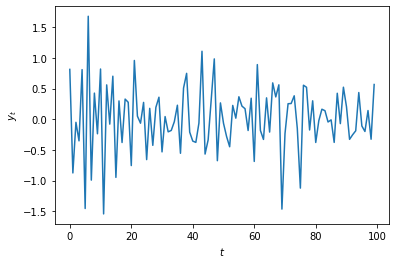

In [24]:
# Set ar_coefs and ma_coefs for an MA(1) model with MA lag-1 coefficient of -0.7.
# Generate a time series of 100 values.

# Remember that the first value of each of the ar_coefs and ma_coefs lists should be 1 for the lag-0 coefficient.
# Remember that an MA(1) model is just an ARMA(0,1) model. 
# Therefore ma_coefs should have a lag-0 and a lag-1 coefficient and ar_coefs should only 
# have a lag-0 coefficient and nothing else (e.g. ma_coefs = [1, ____] and ar_coefs = [1]).

# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show();

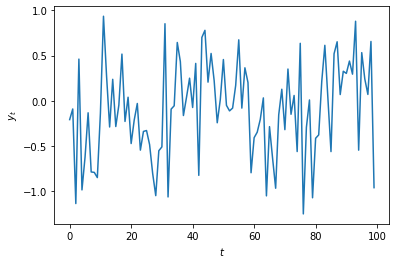

In [25]:
# Set the coefficients for an AR(2) model with AR lag-1 and lag-2 coefficients of 0.3 and 0.2 respectively.

# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(2)

# Set coefficients
ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show();

<img src="images/ts3_021.png" alt="" style="width: 400px;"/>

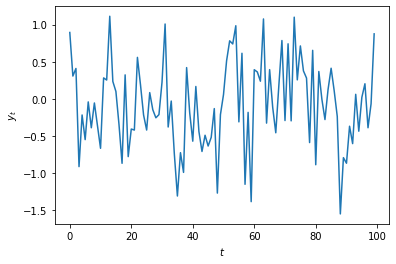

In [26]:
# Remember that the lag-n AR coefficient is used to multiply  yt−n. 
# The lag-n MA coefficient is used to multiply  ϵt−n.
# Don't forget to set the lag-0 coefficients to 1.
# Remember that for lags greater than zero, you need to pass the negative 
# of the desired AR coefficient into the arma_generate_sample() function.

# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(3)

# Set coefficients
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3, 0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show();

## Fitting Prelude

Great, you understand model order! Understanding the order is important when it comes to fitting models. You will always need to select the order of model you fit to your data, no matter what that data is.

In this exercise you will do some basic fitting. Fitting models is the next key step towards making predictions. We'll go into this more next but let's get a head start.

Some example ARMA(1,1) data have been created and are available in your environment as y. This data could represent the amount of traffic congestion. You could use forecasts of this to suggest the efficient routes for drivers.

In [27]:
y = np.array([ 0.34190914,  0.13829197, -0.64945928, -0.65537413, -0.68978958,
       -1.12454144, -1.86127201, -1.37882992, -0.30102186,  0.42481675,
        1.22368808,  1.42363572,  0.96232824, -0.48030637,  0.03565288,
        1.59150471,  1.53113636,  0.81424611,  0.0879735 , -0.24112373,
        0.17427009,  0.07263373, -0.417975  ,  0.11899427,  0.15675439,
       -0.28334493, -0.13649536, -0.16311117, -0.402618  ,  0.31255678,
        0.71995467, -0.7656674 , -0.99826712, -1.17139065, -1.96987948,
       -0.72627994,  0.33287687,  1.14513414,  1.89798507,  1.83951918,
        2.06593831,  0.71756693, -0.51999547, -0.78659096, -0.60668996,
       -0.40955911, -0.12658671, -0.58923554, -1.17155413, -1.56369429,
       -2.00370608, -1.68439416, -0.48329839,  0.81586532,  1.22611453,
        1.01768257,  0.45980738, -0.49905395, -0.15160183,  0.67123982,
        0.01838425, -0.51638427,  0.19485306,  0.46309888, -0.42197727,
       -0.63982125,  0.48956233,  1.23542872,  2.03599236,  1.65394583,
        0.86763182,  0.54464208,  0.34272888, -0.22958483, -0.15583621,
       -0.72411795, -1.60567934, -1.54845567, -1.58041686, -1.27089516,
       -0.20972161,  0.72090272,  1.02185735,  0.6115321 ,  0.56476131,
        0.58748187,  1.48663823,  2.06535053,  2.00243273,  2.01768767,
        1.17295556,  0.82846019,  0.97277989,  0.8065138 ,  0.61837411,
        0.52372123, -0.26309541, -0.70708818,  0.09382882,  0.42640257,
       -0.13769415, -1.33245809, -1.68915512, -1.7471819 , -1.10375575,
        0.13915823,  0.34457329,  0.27448182,  0.51702866,  0.40277662,
        0.56715813,  0.55458773,  0.17365006,  0.65547964,  0.97899584,
        0.05327191, -0.28481483,  0.22240486, -0.53233418, -1.18182482,
       -0.52025024, -0.21145306,  1.17164486,  2.02572459,  1.28013731,
       -0.26437116,  0.03929047, -0.09578587, -0.35037742,  0.60894163,
        1.78220263,  1.13232188,  0.3866827 ,  0.56500106,  0.96726987,
        0.86589119,  0.95544512,  1.6054438 ,  0.61211447, -0.37599159,
       -1.27691384, -1.6199941 , -0.29011378,  0.70720506,  0.95210122,
        0.94246101,  1.38351042,  0.44517832,  0.25727139,  1.47985308,
        1.77326782,  1.57618708,  1.08076922,  0.27842369, -0.18713854,
       -0.05010889, -0.20077345, -0.57804408,  0.67849776,  1.0079325 ,
        0.59604104,  0.32302576, -0.22104679, -0.09810517,  1.15097634,
        1.6115715 ,  0.78075115,  1.13985449,  0.94737107,  0.06743602,
       -0.44853422, -1.33362123, -0.86380828,  0.80435857,  0.17358113,
       -0.58429631, -0.10662723, -0.49711892, -0.55959179, -0.13296733,
        0.12608651,  0.06243834, -0.34140257, -0.13424201,  0.00478038,
       -0.27621894, -0.61657367, -1.02118792, -1.32718845, -0.46108025,
        0.59256266,  1.54287643,  1.365126  ,  1.12776467,  0.64282131,
        0.13372076,  0.81562982,  1.22853318,  0.65833756,  0.77306845,
        0.17940283,  0.59387281,  0.76551111,  0.96341641,  0.95398675,
        0.32649389, -0.22385996, -0.39908789, -1.24702195, -1.48312575,
       -1.08260666, -0.88305921, -0.73099951, -0.84436361, -0.89654238,
        0.61148186,  1.35030942, -0.66311261, -1.83682898, -1.99200083,
       -1.39430621, -0.57686326, -0.25783371, -0.52824321, -1.14328581,
       -1.04733303, -1.71216986, -1.87125219, -1.34679777, -1.13329249,
       -0.65103996,  0.37301967,  0.75472977, -0.0500129 , -0.55186905,
       -0.61912059, -0.17433609,  0.57145757,  0.97005756,  0.93276493,
        1.25396648,  2.2617973 ,  1.69215622,  0.30872568, -0.56832809,
       -1.06217994, -0.60907086,  0.58578571,  0.31506667,  0.39378166,
       -0.03673557, -1.27100533, -0.6827684 , -0.4539117 ,  0.07582962,
        0.99035443,  0.92579465, -0.01470086, -0.36034918, -0.5993383 ,
       -0.30167768,  0.59671238,  1.8069026 ,  2.60945039,  1.16780075,
        0.07609465, -0.41668023, -0.24069804, -0.046038  ,  0.30635079,
        0.7918695 ,  1.01882696,  2.25382156,  2.64527018,  2.40611663,
        1.98771553,  1.07307085,  0.22277408,  0.14125567,  0.32611225,
        1.1824021 ,  1.0869389 ,  0.65380277,  0.53696191,  0.76508597,
        0.6934151 ,  1.12328526,  0.84254025,  0.53078349,  1.15627221,
        1.00227049,  0.66400157,  0.07466486, -0.83487386, -1.10366748,
       -0.34314086, -0.48280137, -0.75453551, -1.09401748, -0.6431358 ,
        0.09086927,  0.81992228,  1.1514958 ,  0.68072155,  0.2808582 ,
        0.42674347,  0.57378456,  0.47639989, -0.10781441, -0.4757389 ,
        0.13707627,  0.80456204,  0.37988155,  0.71830454,  1.6231057 ,
        1.93152593,  1.88758583,  1.01149335, -0.22713392, -0.64791816,
        0.66473341,  1.47271195,  1.42608505,  1.40475867,  0.57650675,
       -0.87352602, -1.01439986, -1.21162446, -0.79262333,  0.63201681,
        1.02411474,  1.14770458,  1.69660996,  1.07674875, -0.64340866,
       -0.83093439,  0.02947694, -0.04818131, -0.59591127, -0.64360081,
       -0.29332213, -1.26515261, -1.64155807, -0.76869617, -0.29442788,
        0.02687944,  0.6577766 ,  0.75916444,  0.34473106, -0.15362543,
       -0.05091595,  1.01157145,  0.98611119,  0.53759989,  0.00957471,
       -0.8351558 , -0.80551075,  0.21254287,  0.57814817,  1.15317047,
        0.58095549,  0.20030394,  0.7154726 ,  0.76264073,  0.40000413,
        0.91544669,  1.59532613,  1.00794379,  1.74470841,  1.83920204,
        1.17723143,  0.04156263, -0.88770707, -0.38769903, -0.05790427,
       -0.25573758, -1.20554866, -0.47372597,  0.01680288, -0.49810433,
       -0.22750594,  0.34198335,  1.58008987,  0.88275501, -0.15451441,
       -0.1320695 , -0.57507027, -0.48415304,  0.0482015 ,  0.882797  ,
        0.53032474, -0.5375641 , -0.24225755,  0.81025124,  0.781945  ,
       -0.01503097, -0.83302309, -0.27973283,  0.10262642, -0.30323664,
       -0.76195406, -1.5162597 , -1.26412422, -0.70367535, -0.68598531,
       -1.85679001, -0.67520258,  0.5103924 ,  0.07440595,  0.84473653,
        1.4092971 ,  0.91551478, -0.00277682, -0.48983473, -1.37004356,
       -1.87602404, -1.01983581,  0.4699843 ,  0.39126769,  0.21825148,
        0.32604743, -0.50651872, -0.90097734, -0.66313324, -0.13285705,
        1.02201429,  1.6440056 ,  1.06012611,  0.42141977, -0.06552335,
       -0.63071531, -0.76189012, -0.19870338,  0.32840622,  0.22016804,
        0.40945927, -0.10059261, -0.7292198 , -0.78788138, -1.03981831,
       -0.67025872, -0.49405108, -1.195167  , -0.74287506, -0.52297105,
        0.06066654, -0.48266928, -0.93574356, -1.06062125, -1.63331104,
       -1.6320384 , -0.66945249,  0.07452335,  0.3105287 ,  0.17664866,
        0.23138126,  0.61494211,  0.64405726,  0.49760423,  0.04927754,
       -0.19424516, -0.12727334,  0.13403931, -0.44199157, -1.31621388,
       -1.42951522, -1.36882495, -1.32341303, -0.89094721, -0.56206807,
       -0.3186422 , -0.77052752, -0.01647374,  1.16989259,  0.88058167,
        0.59935233,  0.44975919,  0.53457613,  1.25849038,  1.03673632,
        0.38410188,  0.04438528,  0.49359396,  1.24297323,  0.17940775,
       -0.94307295, -0.52777173, -0.59278023, -0.74678701, -0.0557795 ,
        0.56236047,  1.05844267,  0.81771109, -0.03436228, -0.22699133,
       -0.22871379, -0.29461664, -0.356378  ,  0.39063077,  0.20885201])

In [28]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(y, order=(1,1))

# Fit the model
results = model.fit()

In [29]:
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  500
Model:                     ARMA(1, 1)   Log Likelihood                -364.836
Method:                       css-mle   S.D. of innovations              0.501
Date:                Wed, 25 Dec 2019   AIC                            737.672
Time:                        14:00:55   BIC                            754.530
Sample:                             0   HQIC                           744.287
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1102      0.084      1.315      0.189      -0.054       0.274
ar.L1.y        0.5367      0.041     12.984      0.000       0.456       0.618
ma.L1.y        0.7382      0.034     21.789      0.0

---
<a id='fit'></a>

## Fitting Time Series Models

<img src="images/ts3_022.png" alt="" style="width: 800px;"/>

<img src="images/ts3_023.png" alt="" style="width: 800px;"/>

<img src="images/ts3_024.png" alt="" style="width: 800px;"/>

<img src="images/ts3_025.png" alt="" style="width: 800px;"/>

<img src="images/ts3_026.png" alt="" style="width: 800px;"/>

<img src="images/ts3_027.png" alt="" style="width: 800px;"/>

<img src="images/ts3_028.png" alt="" style="width: 800px;"/>

## Fitting AR and MA models

In this exercise you will fit an AR and an MA model to some data. The data here has been generated using the arma_generate_sample() function we used before.

You know the real AR and MA parameters used to create this data so it is a really good way to gain some confidence with ARMA models and know you are doing it right. In the next exercise you'll move onto some real world data with confidence.

There is a pandas DataFrame available in your environment called sample. It has two columns of different time series data.

In [30]:
sample = pd.read_csv(path+'sample.csv')
sample.drop(['Unnamed: 0'], axis=1, inplace=True)
sample.head()

,timeseries_1,timeseries_2
0,-0.183108,-0.183108
1,-0.245540,-0.117365
2,-0.258830,-0.218789
3,-0.279635,-0.169041
4,-0.384736,-0.282374


In [31]:
# Fit an AR(2) model to the 'timeseries_1' column of sample.
# Print a summary of the fitted model.

# Instantiate the model
model = ARMA(sample['timeseries_1'], order=(2,0))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:           timeseries_1   No. Observations:                 1000
Model:                     ARMA(2, 0)   Log Likelihood                 148.855
Method:                       css-mle   S.D. of innovations              0.208
Date:                Wed, 25 Dec 2019   AIC                           -289.709
Time:                        14:00:56   BIC                           -270.078
Sample:                             0   HQIC                          -282.248
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0027      0.018     -0.151      0.880      -0.037       0.032
ar.L1.timeseries_1     0.8980      0.030     29.510      0.000       0.838       0.958
ar.L2.timeseries_1  

### Question
Using the information in the summary printed, which of the following set of parameters do you think was used to generate the 'timeseries_1' data?

Possible Answers
- ar_coefs = [0.9, 0.3], ma_coefs = [1]
- ar_coefs = [1], ma_coefs = [1, -0.9, 0.3]
- ar_coefs = [1, -0.9, 0.3], ma_coefs = [1] (correct)
- ar_coefs = [1, 0.9, -0.3], ma_coefs = [1]

In [32]:
# Fit an MA(3) model to the 'timeseries_2' column of sample.

# Instantiate the model
model = ARMA(sample['timeseries_2'], order=(0,3))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:           timeseries_2   No. Observations:                 1000
Model:                     ARMA(0, 3)   Log Likelihood                 149.007
Method:                       css-mle   S.D. of innovations              0.208
Date:                Wed, 25 Dec 2019   AIC                           -288.014
Time:                        14:00:56   BIC                           -263.475
Sample:                             0   HQIC                          -278.687
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0018      0.012     -0.159      0.874      -0.024       0.021
ma.L1.timeseries_2     0.1995      0.031      6.352      0.000       0.138       0.261
ma.L2.timeseries_2  

### Question

Using the information in the summary printed, which of the following set of parameters do you think was used to generate the 'timeseries_2' data?

Possible Answers
- ar_coefs = [], ma_coefs = [0.2, 0.6, 0.1]
- ar_coefs = [1], ma_coefs = [1, 0.2, 0.6, -0.1] (correct)
- ar_coefs = [1, 0.2, 0.6, -0.1], ma_coefs = [1]
- ar_coefs = [1], ma_coefs = [1, -0.2, -0.6, 0.1]

The fitted models had very similar AR and MA coefficient values to the real ones! You know it works!

## Fitting an ARMA model

In this exercise you will fit an ARMA model to the `earthquakes` dataset. You saw before that the earthquakes dataset is stationary so you don't need to transform it at all. It comes ready for modeling straight out the ground. You can remind yourself what it looks like below.

The earthquakes dataset is available in your environment as `earthquake`. The `ARMA` class is also available in your environment.

In [33]:
earthquake = pd.read_csv(path+'earthquakes.csv', 
            index_col='date',
            parse_dates=True)
earthquake.head()

,Year,earthquakes_per_year
date,,
1900-01-01,1900,13.0
1901-01-01,1901,14.0
1902-01-01,1902,8.0
1903-01-01,1903,10.0
1904-01-01,1904,16.0


In [34]:
# Instantiate an ARMA(3,1) model and pass it the earthquakes dataset.
# Fit the model.
# Print the summary of the model fit.

# Instantiate the model
model = ARMA(earthquake['earthquakes_per_year'], order=(3,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                               ARMA Model Results                               
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                       ARMA(3, 1)   Log Likelihood                -315.673
Method:                         css-mle   S.D. of innovations              5.853
Date:                  Wed, 25 Dec 2019   AIC                            643.345
Time:                          14:00:57   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         19.6452      1.929     10.183      0.000      15.864      23.426
ar.L1.earthquakes_per_year     0.5794      0.416      1.393      0.

/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


## Fitting an ARMAX model

In this exercise you will fit an `ARMAX model` to a time series which represents the wait times at an accident and emergency room for urgent medical care.

The variable you would like to model is the wait times to be seen by a medical professional `wait_times_hrs`. This may be related to an `exogenous variable` that you measured `nurse_count` which is the number of nurses on shift at any given time. These can be seen below.

<img src="images/ts3_029.png" alt="" style="width: 400px;"/>

This is a particularly interesting case of time series modeling as, if the number of nurses has an effect, you could change this to affect the wait times.

The time series data is available in your environment as `hospital` and has the two columns mentioned above. The ARMA class is also available for you.

In [35]:
hospital = pd.read_csv(path+'hospital.csv', index_col='Unnamed: 0', parse_dates=True)
#hospital.drop(['Unnamed: 0'], axis=1, inplace=True)
hospital.head()

,wait_times_hrs,nurse_count
2019-03-04 00:00:00,1.747261,1.0
2019-03-04 01:00:00,1.664634,1.0
2019-03-04 02:00:00,1.647047,1.0
2019-03-04 03:00:00,1.619512,1.0
2019-03-04 04:00:00,1.480415,1.0


In [36]:
# Instantiate an ARMAX(2,1) model to train on the 'wait_times_hrs' 
# column of hospital using the 'nurse_count' column as an exogenous variable.
# Fit the model.
# Print the summary of the model fit.

# Instantiate the model
model = ARMA(hospital['wait_times_hrs'], order=(2,1), exog=hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:                     ARMA(2, 1)   Log Likelihood                 -11.834
Method:                       css-mle   S.D. of innovations              0.259
Date:                Wed, 25 Dec 2019   AIC                             35.668
Time:                        14:00:58   BIC                             54.411
Sample:                    03-04-2019   HQIC                            43.275
                         - 03-10-2019                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1000      0.086     24.293      0.000       1.931       2.269
nurse_count             -0.1171      0.013     -9.054      0.000      -0.142      -0.092
ar.L1.wait_t

/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Look back at the model parameters. What is the relation between the number of nurses on shift and the wait times? If you predicted that tomorrow was going to have long wait times how could you combat this?

## Forecasting

<img src="images/ts3_030.png" alt="" style="width: 800px;"/>

<img src="images/ts3_031.png" alt="" style="width: 800px;"/>

<img src="images/ts3_032.png" alt="" style="width: 800px;"/>

<img src="images/ts3_033.png" alt="" style="width: 800px;"/>

<img src="images/ts3_034.png" alt="" style="width: 800px;"/>

<img src="images/ts3_035.png" alt="" style="width: 800px;"/>

<img src="images/ts3_036.png" alt="" style="width: 800px;"/>

<img src="images/ts3_037.png" alt="" style="width: 800px;"/>

<img src="images/ts3_038.png" alt="" style="width: 800px;"/>

<img src="images/ts3_039.png" alt="" style="width: 800px;"/>

<img src="images/ts3_040.png" alt="" style="width: 800px;"/>

## Generating one-step-ahead predictions

It is very hard to forecast stock prices. Classic economics actually tells us that this should be impossible because of market clearing.

Your task in this exercise is to attempt the impossible and predict the Amazon stock price anyway.

In this exercise you will generate `one-step-ahead predictions` for the stock price as well as the uncertainty of these predictions.

A model has already been fitted to the Amazon data for you. The results object from this model is available in your environment as `results`.

- Use the results object to make one-step-ahead predictions over the latest 30 days of data and assign the result to one_step_forecast.
- Assign your mean predictions to mean_forecast using one of the attributes of the one_step_forecast object.
- Extract the confidence intervals of your predictions from the one_step_forecast object and assign them to confidence_intervals.
- Print your mean predictions.

In [37]:
amazon = pd.read_csv(path+'amazon.csv', 
            index_col='date',
            parse_dates=True)
amazon.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


In [38]:
# Calculate log-return and drop nans
amazon_log = np.log(amazon/amazon.shift(1)).dropna()

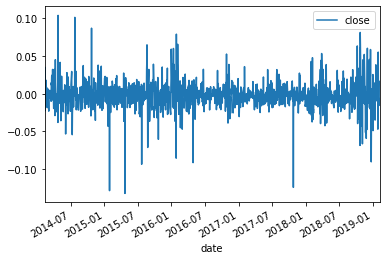

In [39]:
fig, ax = plt.subplots()
amazon_log.plot(ax=ax)
plt.show()

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Instantiate the model
model = SARIMAX(amazon, order=(1,0,1))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                  close   No. Observations:                 1259
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -5547.864
Date:                Wed, 25 Dec 2019   AIC                          11101.728
Time:                        14:00:59   BIC                          11117.142
Sample:                             0   HQIC                         11107.520
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.000   4327.295      0.000       0.999       1.000
ma.L1         -0.0281      0.012     -2.326      0.020      -0.052      -0.004
sigma2       391.0494      5.944     65.784      0.0

/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [41]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast)

date
2014-03-24    354.335085
2014-03-21    351.868767
2014-03-20    360.321308
2014-03-19    368.672980
2014-03-18    373.047497
2014-03-17    378.553896
2014-03-14    375.084345
2014-03-13    373.723484
2014-03-12    371.518266
2014-03-11    370.610820
2014-03-10    368.816763
2014-03-07    370.427912
2014-03-06    371.959973
2014-03-05    372.100256
2014-03-04    372.308264
2014-03-03    364.083690
2014-02-28    359.848788
2014-02-27    361.984000
2014-02-26    360.129805
2014-02-25    359.756963
2014-02-24    358.308333
2014-02-21    351.912552
2014-02-20    346.854568
2014-02-19    349.666253
2014-02-18    347.393822
2014-02-14    353.422531
2014-02-13    357.187522
2014-02-12    357.147709
2014-02-11    349.421453
2014-02-10    361.389349
dtype: float64


You can use theis one-step-ahead forecast to `estimate what your error` would be, if you were to make a prediction for the Amazon stock price of tomorrow.

## Plotting one-step-ahead predictions

Now that you have your predictions on the Amazon stock, you should plot these predictions to see how you've done.

You made predictions over the latest 30 days of data available, always forecasting just one day ahead. By evaluating these predictions you can judge how the model performs in making predictions for just the next day, where you don't know the answer.

The `lower_limits`, `upper_limits` and `amazon` DataFrames as well as your mean prediction `mean_forecast` that you created in the last exercise are available in your environment.

- Plot the amazon data, using the amazon.index as the x coordinates.
- Plot the mean_forecast prediction similarly, using mean_forecast.index as the x-coordinates.
- Plot a shaded area between lower_limits and upper_limits of your confidence interval. Use the index of lower_limits as the x coordinates.

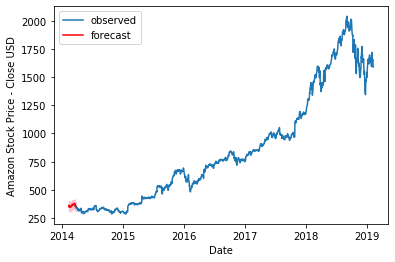

In [42]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show();

<img src="images/ts3_041.png" alt="" style="width: 00px;"/>

Have a look at your plotted forecast. Is the mean prediction close to the observed values? Do the observed values lie between the upper and lower limits of your prediction?

## Generating dynamic forecasts

Now lets move a little further into the future, to dynamic predictions. What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where `dynamical predictions` come in.

Remember that **it is more difficult to make precise long-term forecasts because the `shock terms` add up**. The further into the future the predictions go, the more uncertain. This is especially true with stock data and so you will likely find that your predictions in this exercise are not as precise as those in the last exercise.

- Use the results object to make a dynamic predictions for the latest 30 days and assign the result to dynamic_forecast.
- Assign your predictions to a new variable called mean_forecast using one of the attributes of the dynamic_forecast object.
- Extract the confidence intervals of your predictions from the dynamic_forecast object and assign them to a new variable confidence_intervals.
- Print your mean predictions.

In [43]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

date
2014-03-24    354.335085
2014-03-21    354.283562
2014-03-20    354.232046
2014-03-19    354.180538
2014-03-18    354.129037
2014-03-17    354.077544
2014-03-14    354.026058
2014-03-13    353.974580
2014-03-12    353.923109
2014-03-11    353.871646
2014-03-10    353.820190
2014-03-07    353.768742
2014-03-06    353.717301
2014-03-05    353.665868
2014-03-04    353.614442
2014-03-03    353.563023
2014-02-28    353.511612
2014-02-27    353.460209
2014-02-26    353.408813
2014-02-25    353.357424
2014-02-24    353.306043
2014-02-21    353.254670
2014-02-20    353.203304
2014-02-19    353.151945
2014-02-18    353.100594
2014-02-14    353.049250
2014-02-13    352.997914
2014-02-12    352.946585
2014-02-11    352.895264
2014-02-10    352.843950
dtype: float64


Statsmodels makes it super simple to switch between one-step ahead and dynamical predictions.

## Plotting dynamic forecasts

Time to plot your predictions. Remember that making dynamic predictions, means that your model makes predictions with no corrections, unlike the one-step-ahead predictions. This is kind of like making a forecast now for the next 30 days, and then waiting to see what happens before comparing how good your predictions were.

The `lower_limits`, `upper_limits` and `amazon` DataFrames as well as your mean predictions `mean_forecast` that you created in the last exercise are available in your environment.

- Plot the amazon data using the dates in the index of this DataFrame as the x coordinates and the values as the y coordinates.
- Plot the mean_forecast predictions similarly.
- Plot a shaded area between lower_limits and upper_limits of your confidence interval. Use the index of one of these DataFrames as the x coordinates.

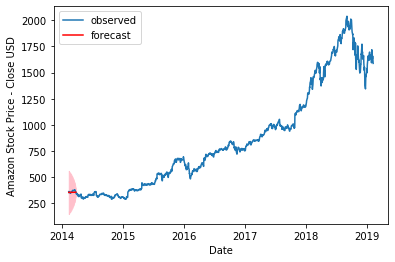

In [44]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show();

<img src="images/ts3_042.png" alt="" style="width: 400px;"/> 

It is very hard to predict stock market performance and so your predictions have a wide uncertainty. However, note that the real stock data stayed within your uncertainty limits!

---
<a id='arima'></a>

## Intro to ARIMA models

<img src="images/ts3_043.png" alt="" style="width: 800px;"/>

<img src="images/ts3_044.png" alt="" style="width: 800px;"/>

<img src="images/ts3_045.png" alt="" style="width: 800px;"/>

<img src="images/ts3_046.png" alt="" style="width: 800px;"/>

<img src="images/ts3_047.png" alt="" style="width: 800px;"/>

<img src="images/ts3_048.png" alt="" style="width: 800px;"/>

## Differencing and fitting ARMA

In this exercise you will fit an `ARMA model` to the Amazon stocks dataset. As you saw before, this is a non-stationary dataset. You will use differencing to make it stationary so that you can fit an ARMA model.

In the next section you'll make a forecast of the differences and use this to forecast the actual values.

The Amazon stock time series in available in your environment as `amazon`. The `SARIMAX` model class is also available in your environment.

- Use the .diff() method of amazon to make the time series stationary by taking the first difference. Don't forget to drop the NaN values using the .dropna() method.
- Create an ARMA(2,2) model using the SARIMAX class, passing it the stationary data.
- Fit the model.

In [45]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = SARIMAX(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5534.654
Date:                Wed, 25 Dec 2019   AIC                          11079.308
Time:                        14:01:06   BIC                          11104.995
Sample:                             0   HQIC                         11088.962
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1773      0.103     -1.723      0.085      -0.379       0.024
ar.L2          0.7722      0.105      7.352      0.000       0.566       0.978
ma.L1          0.1639      0.098      1.669      0.0

**Remember that now you have a model which you can use to predict the difference values, not the absolute value of the amazon dataset.**

## Unrolling ARMA forecast

Now you will use the model that you trained in the previous exercise arma in order to forecast the absolute value of the Amazon stocks dataset. Remember that sometimes predicting the difference could be enough; will the stocks go up, or down; but sometimes the absolute value is key.

The results object from the model you trained in the last exercise is available in your environment as `arma_results`. The `np.cumsum()` function and the original DataFrame amazon are also available.

- Use the .get_forecast() method of the arma_results object and select the predicted mean of the next 10 differences.
- Use the np.cumsum() function to integrate your difference forecast.
- Add the last value of the original DataFrame to make your forecast an absolute value.

In [46]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

1258    359.999388
1259    360.587838
1260    359.811248
1261    360.403300
1262    359.698675
1263    360.280753
1264    359.633468
1265    360.197680
1266    359.597839
1267    360.139846
dtype: float64


/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


You have just made an ARIMA forecast the hard way. Next you'll use statsmodels to make things easier.

## Fitting an ARIMA model

In this exercise you'll learn how to be lazy in time series modeling. Instead of taking the difference, modeling the difference and then integrating, you're just going to lets statsmodels do the hard work for you.

You'll repeat the same exercise that you did before, of forecasting the absolute values of the Amazon stocks dataset, but this time with an `ARIMA model`.

A subset of the stocks dataset is available in your environment as `amazon` and so is the `SARIMAX` model class.

- Create an ARIMA(2,1,2) model, using the SARIMAX class, passing it the Amazon stocks data amazon.
- Fit the model.
- Make a forecast of mean values of the Amazon data for the next 10 time steps. Assign the result to arima_value_forecast.

In [47]:
# Create ARIMA(2,1,2) model
arima = SARIMAX(amazon, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1259    360.000727
1260    360.587971
1261    359.812512
1262    360.403538
1263    359.699860
1264    360.281080
1265    359.634576
1266    360.198083
1267    359.598874
1268    360.140316
dtype: float64


/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


You just made the same forecast you made before, but this time with an ARIMA model. Your two forecasts give the same results, but the ARIMA forecast was a lot easier to code!

## Choosing ARIMA model

You are trying to figure out which `ARIMA` model is the best fit for a dataset after trying different degrees of differencing and applying the `Augmented Dicky-Fuller` test on the differenced data. The test statistics were these:

<img src="images/ts3_049.png" alt="" style="width: 800px;"/>

Which kind of ARIMA model should you fit to this time series data?

- ARIMA(p,0,q)
- ARIMA(p,1,q)
- ARIMA(p,2,q) correct
- ARIMA(p,3,q)

You want to make sure our data is stationary but don't want to over difference it either. This is the right call!

---
<a id='acf'></a>

## Intro to ACF and PACF

Finding `order` for a model is crutial. One way of doing it is using an autocorrelation function (ACF) or partial autocorrelation function (PACF).

<img src="images/ts3_050.png" alt="" style="width: 800px;"/> 

<img src="images/ts3_051.png" alt="" style="width: 800px;"/>

<img src="images/ts3_052.png" alt="" style="width: 800px;"/>

<img src="images/ts3_053.png" alt="" style="width: 800px;"/>

<img src="images/ts3_054.png" alt="" style="width: 800px;"/>

<img src="images/ts3_055.png" alt="" style="width: 800px;"/>

<img src="images/ts3_056.png" alt="" style="width: 800px;"/>

<img src="images/ts3_057.png" alt="" style="width: 800px;"/>

## AR or MA

In this exercise you will use the ACF and PACF to decide whether some data is best suited to an MA model or an AR model. Remember that `selecting the right model order is of great importance to our predictions`.

Remember that for different types of models we expect the following behavior in the `ACF` and `PACF`:

<img src="images/ts3_058.png" alt="" style="width: 800px;"/>

A time series with unknown properties, `df` is available for you in your environment.

In [48]:
df = pd.read_csv(path+'df.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
df.head()

,y
2013-01-01,1.624345
2013-01-02,-0.936625
2013-01-03,0.081483
2013-01-04,-0.663558
2013-01-05,0.738023


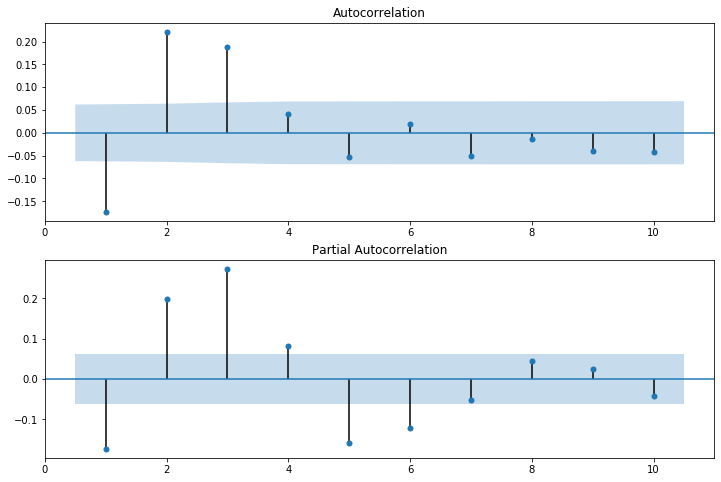

In [49]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2)

plt.show();

## Question

Based on the ACF and PACF plots, what kind of model is this?

Possible Answers
- AR(3)
- MA(3) correct
- ARMA(3,3)

The ACF cuts off after 3 lags and the PACF tails off (shrinks).

## Order of earthquakes

In this exercise you will use the ACF and PACF plots to decide on the most appropriate order to forecast the earthquakes time series.

The earthquakes time series earthquake, the `plot_acf()`, and `plot_pacf()` functions, and the `SARIMAX` model class are available in your environment.

- Plot the ACF and the PACF of the earthquakes time series earthquake up to a lag of 15 steps and don't plot the zeroth lag.
- Create a model object for the earthquakes time series. Select the most appropriate order using the ACF/PACF plots.

In [50]:
earthquake.head()

,Year,earthquakes_per_year
date,,
1900-01-01,1900,13.0
1901-01-01,1901,14.0
1902-01-01,1902,8.0
1903-01-01,1903,10.0
1904-01-01,1904,16.0


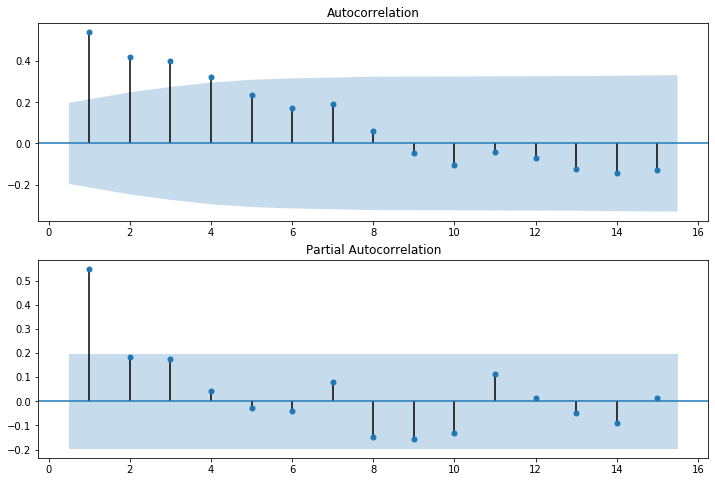

In [51]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(earthquake['earthquakes_per_year'], lags=15, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(earthquake['earthquakes_per_year'], lags=15, zero=False, ax=ax2)

plt.show();

In [52]:
# Create model
arima = SARIMAX(earthquake['earthquakes_per_year'], order=(1,0,0))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

1999-01-01    15.092589
2000-01-01    14.236639
2001-01-01    13.429234
2002-01-01    12.667619
2003-01-01    11.949197
2004-01-01    11.271520
2005-01-01    10.632276
2006-01-01    10.029285
2007-01-01     9.460492
2008-01-01     8.923957
Freq: AS-JAN, dtype: float64


/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


---
<a id='aic'></a>

 ## AIC and BIC
 
- AIC (Akaike Information Criterion) - a metric telling us how good a model is.
- BIC (Bayesian Information Criterion)

<img src="images/ts3_059.png" alt="" style="width: 800px;"/>

<img src="images/ts3_060.png" alt="" style="width: 800px;"/>

<img src="images/ts3_061.png" alt="" style="width: 800px;"/>
 
## Searching over model order

In this exercise you are faced with a dataset which appears to be an ARMA model. You can see the ACF and PACF in the plot below. In order to choose the best order for this model you are going to have to do a search over lots of potential model orders to find the best set.

The SARIMAX model class and the time series DataFrame `df` are available in your environment.

In [53]:
df = pd.read_csv(path+'df4.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
df.head()

,y
2013-01-01,1.624345
2013-01-02,0.525285
2013-01-03,-0.940158
2013-01-04,-1.671342
2013-01-05,0.122849


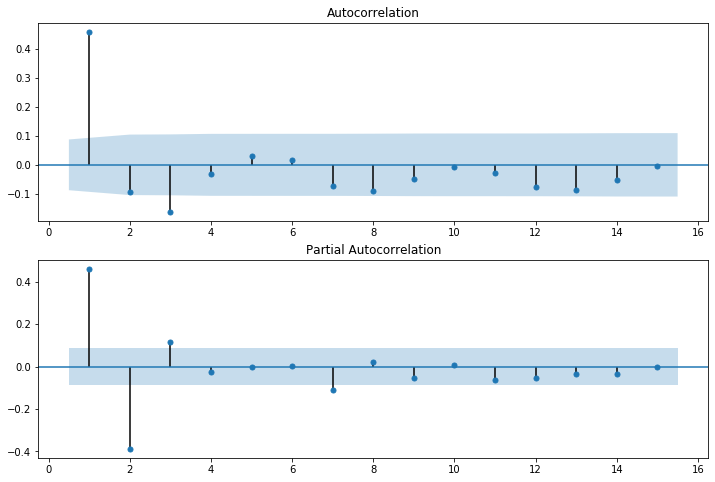

In [54]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(df, lags=15, zero=False, ax=ax1)
plot_pacf(df, lags=15, zero=False, ax=ax2)
plt.show();

- Loop over values of p from 0-2.
- Loop over values of q from 0-2.
- Train and fit an ARMA(p,q) model.
- Append a tuple of (p,q, AIC value, BIC value) to order_aic_bic.

In [55]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
# AR model
for p in range(0,3):
  # Loop over q values from 0-2
  # MA model
    for q in range(0,3):
        try:
            # create and fit ARMA(p,q) model
            model = SARIMAX(df, order=(p,0,q))
            results = model.fit()
        
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            # Append order and results tuple
            order_aic_bic.append((p, q, None, None))

/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D wil

You built 9 models in just a few seconds! In the next exercise you will evaluate the results to choose the best model.

## Choosing order with AIC and BIC

Now that you have performed a search over many model orders, you will evaluate your results to find the best model order.

The list of tuples of `(p,q, AIC value, BIC value)` that you created in the last exercise, `order_aic_bic`, is available in your environment. pandas has also been imported as pd.

- Create a DataFrame to hold the order search information in the order_aic_bic list. Give it the column names ['p', 'q', 'AIC', 'BIC'].
- Print the DataFrame in order of increasing AIC and then BIC.

In [56]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q          AIC          BIC
7  2  1  1414.248679  1431.107112
8  2  2  1416.084892  1437.157932
5  1  2  1417.029939  1433.888371
6  2  0  1419.109454  1431.753279
2  0  2  1425.057439  1437.701264
4  1  1  1428.051695  1440.695520
1  0  1  1429.988724  1438.417940
3  1  0  1497.307531  1505.736748
0  0  0  1615.493870  1619.708478
   p  q          AIC          BIC
7  2  1  1414.248679  1431.107112
6  2  0  1419.109454  1431.753279
5  1  2  1417.029939  1433.888371
8  2  2  1416.084892  1437.157932
2  0  2  1425.057439  1437.701264
1  0  1  1429.988724  1438.417940
4  1  1  1428.051695  1440.695520
3  1  0  1497.307531  1505.736748
0  0  0  1615.493870  1619.708478


## Question

Which of the following models is the best fit?

Possible Answers
- ARMA(0,0)
- ARMA(2,0)
- ARMA(0,2)
- ARMA(2,1) correct
- ARMA(2,2)

This time AIC and BIC favored the same model, but this won't always be the case.

## AIC and BIC vs ACF and PACF

In this exercise you will apply an AIC-BIC order search for the earthquakes time series. In the last lesson you decided that this dataset looked like an AR(1) process. You will do a grid search over parameters to see if you get the same results. The ACF and PACF plots for this dataset are shown below.

The SARIMAX model class and the time series DataFrame earthquake are available in your environment.

In [57]:
earthquake = pd.read_csv(path+'earthquakes.csv', 
            index_col='date',
            parse_dates=True)
earthquake.head()

,Year,earthquakes_per_year
date,,
1900-01-01,1900,13.0
1901-01-01,1901,14.0
1902-01-01,1902,8.0
1903-01-01,1903,10.0
1904-01-01,1904,16.0


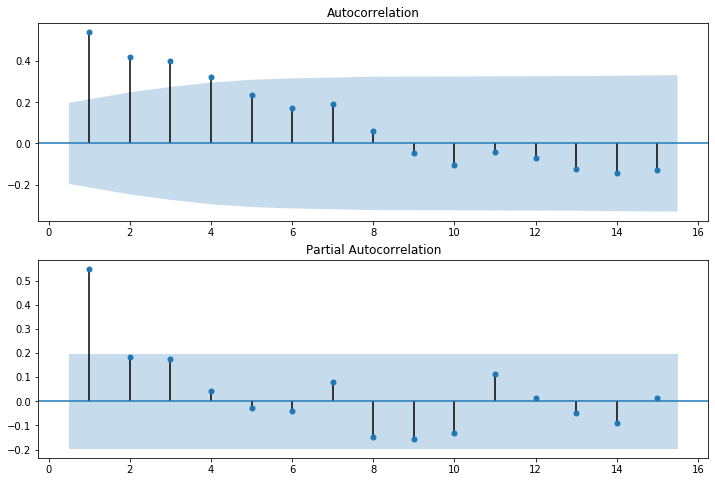

In [58]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(earthquake['earthquakes_per_year'], lags=15, zero=False, ax=ax1)
plot_pacf(earthquake['earthquakes_per_year'], lags=15, zero=False, ax=ax2)
plt.show();

- Loop over orders of p and q between 0 and 2.
- Inside the loop try to fit an ARMA(p,q) to earthquake on each loop.
- Print p and q alongside AIC and BIC in each loop.
- If the model fitting procedure fails print p, q, None, None.

In [59]:
# Loop over p values from 0-2
for p in range(0,3):
    # Loop over q values from 0-2
    for q in range(0,3):
      
        try:
            # create and fit ARMA(p,q) model
            model = SARIMAX(earthquake['earthquakes_per_year'], order=(p,0,q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)     

/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so infe

0 0 888.4297722924081 891.0248921425426
0 1 799.6741727812073 804.8644124814765
0 2 761.0674787503889 768.8528383007927
1 0 666.6455255041611 671.8357652044303
1 1 647.1322999673815 654.9176595177853
1 2 648.7385664620634 659.1190458626018
2 0 656.0283744146391 663.8137339650428
2 1 648.8428399959242 659.2233193964626
2 2 648.8506443429098 661.8262435935828


If you look at your printed results you will see that the AIC and BIC both actually favor an ARMA(1,1) model. This isn't what you predicted from the ACF and PACF but notice that the lag 2-3 PACF values are very close to significant, so the ACF/PACF are close to those of an ARMA(p,q) model.

---
<a id='diag'></a>

## Model diagnostics

<img src="images/ts3_062.png" alt="" style="width: 800px;"/>

<img src="images/ts3_063.png" alt="" style="width: 800px;"/>

<img src="images/ts3_064.png" alt="" style="width: 800px;"/>

<img src="images/ts3_065.png" alt="" style="width: 800px;"/>

<img src="images/ts3_066.png" alt="" style="width: 800px;"/>

<img src="images/ts3_067.png" alt="" style="width: 800px;"/>

<img src="images/ts3_068.png" alt="" style="width: 800px;"/>

<img src="images/ts3_069.png" alt="" style="width: 800px;"/>

<img src="images/ts3_070.png" alt="" style="width: 800px;"/>

<img src="images/ts3_071.png" alt="" style="width: 800px;"/>

## Mean absolute error

Obviously, before you use the model to predict, you want to know how accurate your predictions are. The `mean absolute error (MAE)` is a good statistic for this. It is the mean difference between your predictions and the true values.

In this exercise you will calculate the `MAE` for an ARMA(1,1) model fit to the earthquakes time series

numpy has been imported into your environment as np and the earthquakes time series is available for you as `earthquake`.

- Use np functions to calculate the Mean Absolute Error (MAE) of the residuals attribute of the results object.
- Print the MAE.
- Use the DataFrame's .plot() method with no arguments to plot the earthquake time series.

4.755625669545705


/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


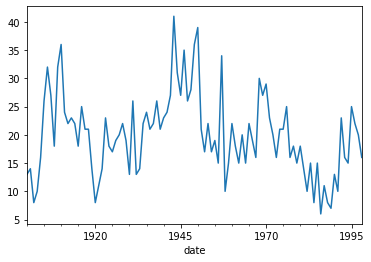

In [60]:
# Fit model
model = SARIMAX(earthquake['earthquakes_per_year'], order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake['earthquakes_per_year'].plot()
plt.show()

Your mean error is about 4-5 earthquakes per year. You have plotted the time series so that you can see how the MAE compares to the spread of the time series. Considering that there are about 20 earthquakes per year that is not too bad.

## Diagnostic summary statistics

It is important to know when you need to go back to the drawing board in model design. In this exercise you will use the `residual test statistics` in the results summary to decide whether a model is a good fit to a time series.

Here is a reminder of the tests in the model summary:

<img src="images/ts3_072.png" alt="" style="width: 800px;"/>

An unknown time series `df` and the SARIMAX model class are available for you in your environment.
- Fit an ARMA(3,1) model to the time series df.
- Print the model summary.

In [61]:
df = pd.read_csv(path+'df5.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
df.head()

,y
2013-01-01,1.624345
2013-01-02,-0.936625
2013-01-03,-0.113438
2013-01-04,-0.625882
2013-01-05,0.821035


In [62]:
# Create and fit model
model1 = SARIMAX(df, order=(3,0,1))
results1 = model1.fit()

# Print summary
print(results1.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(3, 0, 1)   Log Likelihood                -407.842
Date:                Wed, 25 Dec 2019   AIC                            825.683
Time:                        14:01:29   BIC                            844.202
Sample:                    01-01-2013   HQIC                           833.095
                         - 10-27-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1533      0.139      1.100      0.271      -0.120       0.427
ar.L2          0.2072      0.060      3.471      0.001       0.090       0.324
ar.L3          0.2522      0.061      4.139      0.0

/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


## Question

Based on the outcomes of the tests in the summary, which of the following is correct about the residuals of results1?

Possible Answers
- They are not correlated and are normally distributed. (correct)
- They are correlated and are normally distributed.
- They are not correlated and are not normally distributed.
- They are correlated and are not normally distributed.
- The outcome of tests are not conclusive.

- Fit an AR(2) model to the time series df.
- Print the model summary.

In [63]:
# Create and fit model
model2 = SARIMAX(df, order=(2,0,0))
results2 = model2.fit()

# Print summary
print(results2.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -422.266
Date:                Wed, 25 Dec 2019   AIC                            850.532
Time:                        14:01:32   BIC                            861.643
Sample:                    01-01-2013   HQIC                           854.979
                         - 10-27-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2159      0.053     -4.045      0.000      -0.320      -0.111
ar.L2          0.0654      0.057      1.156      0.248      -0.045       0.176
sigma2         0.9773      0.076     12.831      0.0

/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


## Question

Based on the outcomes of the tests in the summary, which of the following is correct about the residuals of results2?

Possible Answers
- They are not correlated and are normally distributed.
- They are correlated and are normally distributed. (correct)
- They are not correlated and are not normally distributed.
- They are correlated and are not normally distributed.
- The outcome of tests are not conclusive.

Our model didn't pull out all the correlations in the data. This suggests we could make it better. Perhaps by increasing the model order.

## Plot diagnostics

It is important to know when you need to go back to the drawing board in model design. In this exercise you will use 4 common plots to decide whether a model is a good fit to some data.

Here is a reminder of what you would like to see in each of the plots for a model that fits well:

<img src="images/ts3_073.png" alt="" style="width: 800px;"/>

An unknown time series df and the SARIMAX model class are available for you in your environment.

- Fit an ARIMA(1,1,1) model to the time series df.
- Create the 4 diagnostic plots.

In [64]:
df = pd.read_csv(path+'df6.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
df.head()

,y
2013-01-01,1.624345
2013-01-02,1.337458
2013-01-03,0.784396
2013-01-04,-0.401674
2013-01-05,0.215209


/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


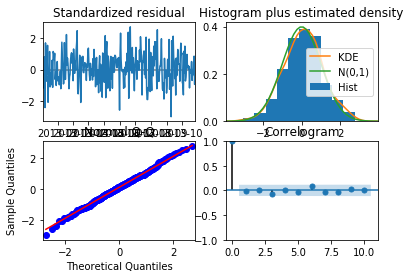

In [65]:
# Create and fit model
model = SARIMAX(df, order=(1,1,1))
results=model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

## Question

Do these plots suggest that any of these are true about the model fit.

Possible Answers
- The residuals are not normally distributed. You should try increasing p. (Based on the Q-Q plot and the histogram plot, the residuals do seem normally distributed.)
- The residuals are correlated. You should increase p or q. (The amount of correlation at each lag in the correlogram is not significant. The residuals seem uncorrelated.)
- None of the above. (correct)

---
<a id='box'></a>

## Box-Jenkins method

<img src="images/ts3_075.png" alt="" style="width: 800px;"/>

<img src="images/ts3_076.png" alt="" style="width: 800px;"/>

<img src="images/ts3_077.png" alt="" style="width: 800px;"/>

<img src="images/ts3_078.png" alt="" style="width: 800px;"/>

<img src="images/ts3_079.png" alt="" style="width: 800px;"/>

<img src="images/ts3_080.png" alt="" style="width: 800px;"/>

<img src="images/ts3_081.png" alt="" style="width: 800px;"/>

<img src="images/ts3_082.png" alt="" style="width: 800px;"/>

<img src="images/ts3_083.png" alt="" style="width: 800px;"/>

## Identification

In the following exercises you will apply to the `Box-Jenkins methodology` to go from an unknown dataset to a model which is ready to make forecasts.

You will be using a new time series. This is the personal savings as % of disposable income 1955-1979 in the US.

The first step of the Box-Jenkins methodology is `Identification`. In this exercise you will use the tools at your disposal to test whether this new time series is stationary.

The time series has been loaded in as a DataFrame `savings` and the `adfuller()` function has been imported.

- Plot the time series using the DataFrame's .plot() method.
- Apply the Dicky-Fuller test to the 'savings' column of the savings DataFrame and assign the test outcome to result.
- Print the Dicky-Fuller test statistics and the associated p-value.

In [66]:
savings = pd.read_csv(path+'savings.csv', 
            index_col='date',
            parse_dates=True)
savings.head()

,savings
date,
1955-01-01,4.9
1955-04-01,5.2
1955-07-01,5.7
1955-10-01,5.7
1956-01-01,6.2


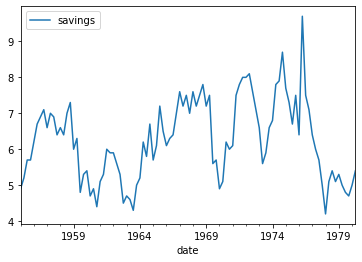

-3.185899096242141
0.020815541644114092


In [67]:
# Plot time series
savings.plot()
plt.show();

# Run Dicky-Fuller test
result = adfuller(savings['savings'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

The Dicky-Fuller test says that the series is stationary. You can confirm this when you look at the plot. There is one fairly high value is 1976 which might be anomalous, but you will leave that for now.

## Identification II

You learned that the savings time series is `stationary` without differencing. Now that you have this information you can try and identify what order of model will be the best fit.

The `plot_acf()` and the `plot_pacf()` functions have been imported and the time series has been loaded into the DataFrame savings.

- Make a plot of the ACF, for lags 1-10 and plot it on axis ax1.
- Do the same for the PACF.

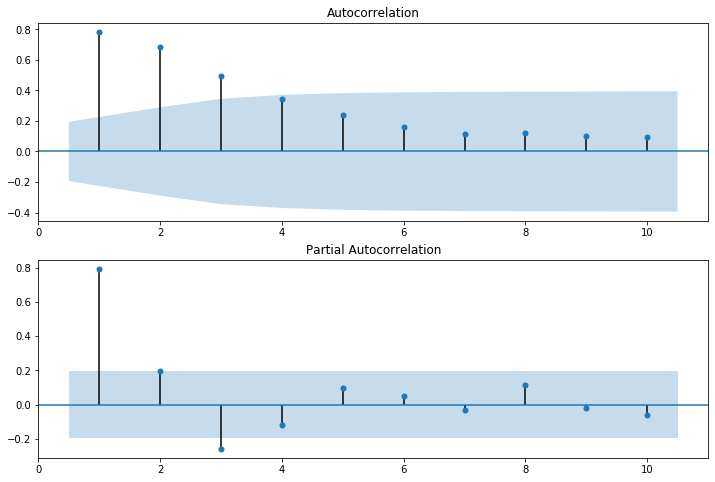

In [68]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(savings, lags=10, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(savings, lags=10, zero=False, ax=ax2)

plt.show();

The ACF and the PACF are a little inconclusive for this ones. The ACF tails off nicely but the PACF might be tailing off or it might be dropping off. So it could be an ARMA(p,q) model or a AR(p) model.

## Estimation

In the last exercise, the ACF and PACF were a little inconclusive. The results suggest your data could be an ARMA(p,q) model or could be an imperfect AR(3) model. In this exercise you will search over models over some model orders to find the best one according to AIC.

The time series savings has been loaded and the SARIMAX class has been imported into your environment.

- Loop over values of from 0 to 3 and values of q from 0 to 3.
- Inside the loop create an ARMA(p,q) model with a constant trend.
- Then fit the model to the time series savings.
- At the end of each loop print the values of p and q and the AIC and BIC.

In [69]:
# Loop over p values from 0-3
for p in range(0,4):
  
  # Loop over q values from 0-3
    for q in range(0,4):
      try:
        # Create and fit ARMA(p,q) model
        model = SARIMAX(savings, order=(p,0,q), trend='c')
        results = model.fit()
        
        # Print p, q, AIC, BIC
        print(p,q,results.aic,results.bic)
        
      except:
        print(p, q, None, None)

/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so infe

0 0 313.6028657326894 318.85281135925794
0 1 267.0697097688692 274.944628208722
0 2 232.16782676455583 242.66771801769292
0 3 217.59720511188743 230.7220691783088
1 0 216.20348062499878 224.0783990648516
1 1 215.70038963866142 226.2002808917985


/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


1 2 207.65298608432607 220.77785015074744
1 3 209.57498691600568 225.32482379571132
2 0 213.97232327543216 224.47221452856925
2 1 213.43035679042714 226.5552208568485


/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


2 2 209.5790343679234 225.32887124762902
2 3 211.57503208838145 229.94984178137133
3 0 209.54493107912012 222.66979514554146
3 1 210.82147634943578 226.57131322914142


/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


3 2 211.45759881821468 229.83240851120456


/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


3 3 213.54389188801392 234.54367439428808


/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


You didn't store and sort your results this time. But the AIC and BIC both picked the ARMA(1,2) model as the best and the AR(3) model as the second best.

## Diagnostics

You have arrived at the model diagnostic stage. So far you have found that the initial time series was stationary, but may have one outlying point. You identified promising model orders using the ACF and PACF and confirmed these insights by training a lot of models and using the AIC and BIC.

You found that the ARMA(1,2) model was the best fit to our data and now you want to check over the predictions it makes before you would move it into production.

The time series `savings` has been loaded and the SARIMAX class has been imported into your environment.

- Retrain the ARMA(1,2) model on the time series, setting the trend to constant.
- Create the 4 standard diagnostics plots.
- Print the model residual summary statistics.

/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


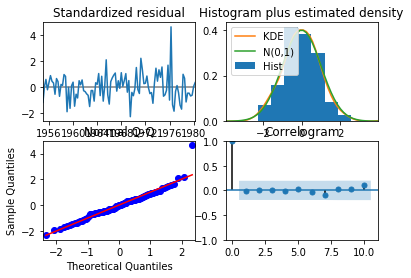

                           Statespace Model Results                           
Dep. Variable:                savings   No. Observations:                  102
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 -98.826
Date:                Wed, 25 Dec 2019   AIC                            207.653
Time:                        14:01:43   BIC                            220.778
Sample:                    01-01-1955   HQIC                           212.968
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6813      0.714      2.356      0.018       0.283       3.080
ar.L1          0.7286      0.111      6.538      0.000       0.510       0.947
ma.L1         -0.0539      0.145     -0.372      0.7

In [70]:
# Create and fit model
model = SARIMAX(savings, order=(1,0,2), trend='c')
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show();

# Print summary
print(results.summary())

The `JB p-value` is zero, which means you should reject the null hypothesis that the residuals are normally distributed. However, the histogram and Q-Q plots show that the residuals look normal. `This time the JB value was thrown off by the one outlying point in the time series`. In this case, you could go back and apply some transformation to remove this outlier or you probably just continue to the production stage.

---
<a id='sarima'></a>

## SARIMA - Seasonal ARIMA Models

## Seasonal time series

<img src="images/ts3_084.png" alt="" style="width: 800px;"/>

<img src="images/ts3_085.png" alt="" style="width: 800px;"/>

<img src="images/ts3_086.png" alt="" style="width: 800px;"/>

<img src="images/ts3_087.png" alt="" style="width: 800px;"/>

<img src="images/ts3_088.png" alt="" style="width: 800px;"/>

<img src="images/ts3_089.png" alt="" style="width: 800px;"/>

<img src="images/ts3_090.png" alt="" style="width: 800px;"/>

<img src="images/ts3_091.png" alt="" style="width: 800px;"/>

## Seasonal decompose

`You can think of a time series as being composed of trend, seasonal and residual components`. This can be a good way to think about the data when you go about modeling it. If you know the period of the time series you can decompose it into these components.

In this exercise you will decompose a time series showing the monthly milk production per cow in the USA. This will give you a clearer picture of the trend and the seasonal cycle. Since the data is monthly you will guess that the seasonality might be 12 time periods, however this won't always be the case.

The milk production time series has been loaded in to the DataFrame `milk_production` and is available in your environment.

- Import the seasonal_decompose() function from statsmodels.tsa.seasonal.
- Decompose the 'pounds_per_cow' column of milk_production using an additive model and frequency of 12 months.
- Plot the decomposition.

In [71]:
milk_production = pd.read_csv(path+'milk_production2.csv', 
            index_col='date',
            parse_dates=True)
milk_production.head()

,pounds_per_cow
date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


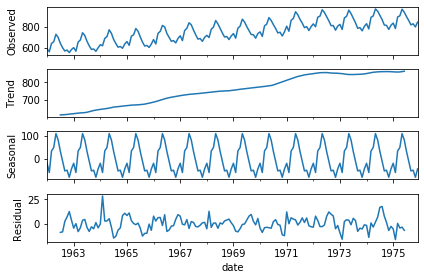

In [72]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], 
                            freq=12)

# Plot decomposition
decomp.plot()
plt.show();

You have extracted the seasonal cycle and now you can see the trend much more clearly.

## Seasonal ACF and PACF

Below is a time series showing the estimated number of water consumers in London. By eye you can't see any obvious seasonal pattern, however your eyes aren't the best tools you have.

<img src="images/ts3_092.png" alt="" style="width: 400px;"/>

In this exercise you will use the ACF and PACF to test this data for seasonality. You can see from the plot above that the time series isn't stationary, so you should probably detrend it. You will detrend it by subtracting the moving average. Remember that you could use a window size of any value bigger than the likely period.

The plot_acf() function has been imported and the time series has been loaded in as `water`.

- Plot the ACF of the 'water_consumers' column of the time series up to 25 lags.

In [73]:
water = pd.read_csv(path+'water.csv', 
            index_col='date',
            parse_dates=True)
water.head()

,water_consumers
date,
1983-01-01,24963
1983-02-01,27380
1983-03-01,32588
1983-04-01,25511
1983-05-01,32313


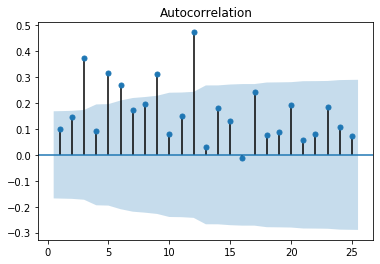

In [74]:
# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(water['water_consumers'], lags=25, zero=False,  ax=ax1)

# Show figure
plt.show();

- Subtract a 15 step rolling mean from the original time series and assign this to water_2
- Drop the NaN values from water_2

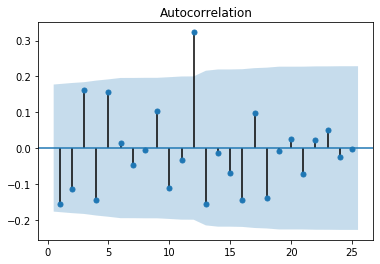

In [75]:
# Subtract the rolling mean
water_2 = water - water.rolling(15).mean()

# Drop the NaN values
water_2 = water_2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax1)

# Show figure
plt.show();

## Question

What is the time period of the seasonal component of this data?

Possible Answers
- 3 time steps.
- 9 time steps.
- 12 time steps. correct
- 15 time steps.
- None. There is no seasonal component.

Although you couldn't see it by looking at the time series itself, the ACF shows that there is an seasonal component and so including it will make your predictions better.

## SARIMA models

<img src="images/ts3_093.png" alt="" style="width: 800px;"/>

<img src="images/ts3_094.png" alt="" style="width: 800px;"/>

<img src="images/ts3_095.png" alt="" style="width: 800px;"/>

<img src="images/ts3_096.png" alt="" style="width: 800px;"/>

<img src="images/ts3_097.png" alt="" style="width: 800px;"/>

## Fitting SARIMA models

Fitting SARIMA models is the beginning of the end of this journey into time series modeling.

`It is important that you get to know your way around the SARIMA model orders` and so that's what you will focus on here.

In this exercise, you will practice fitting different SARIMA models to a set of time series.

The time series DataFrames `df1`, `df2` and `df3` and the SARIMAX model class are available in your environment.

In [76]:
df1 = pd.read_csv(path+'df7.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
df1.head()

,Y
2013-01-01,-259.864025
2013-01-02,651.865698
2013-01-03,53.467569
2013-01-04,-418.111488
2013-01-05,459.277647


- Create a SARIMAX(1,0,0)(1,1,0)$_{7}$ model and fit it to df1.
- Print the model summary table.

In [77]:
# Create a SARIMAX model
model = SARIMAX(df1, order=(1,0,0), seasonal_order=(1,1,0,7))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 Y   No. Observations:                   90
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                -556.243
Date:                           Wed, 25 Dec 2019   AIC                           1118.486
Time:                                   14:01:51   BIC                           1125.742
Sample:                               01-01-2013   HQIC                          1121.401
                                    - 03-31-2013                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1032      0.103      1.002      0.316      -0.099       0.305
ar.S.L7        0.2781      0.104      2.665

/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


- Create a SARIMAX(2,1,1)(1,0,0)4 model and fit it to df2

In [78]:
df2 = pd.read_csv(path+'df8.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
df2.head()

,Y
2013-01-01,-1664.274145
2013-01-02,-1797.404781
2013-01-03,-2108.942905
2013-01-04,-2611.186919
2013-01-05,-3025.791912


In [79]:
# Create a SARIMAX model
model = SARIMAX(df2, order=(2,1,1), seasonal_order=(1,0,0,4))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 Y   No. Observations:                   80
Model:             SARIMAX(2, 1, 1)x(1, 0, 0, 4)   Log Likelihood                -560.340
Date:                           Wed, 25 Dec 2019   AIC                           1130.679
Time:                                   14:01:53   BIC                           1142.526
Sample:                               01-01-2013   HQIC                          1135.426
                                    - 03-21-2013                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2701      0.162      1.672      0.095      -0.047       0.587
ar.L2          0.5015      0.110      4.560

/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


- Create a SARIMAX(1,1,0)(0,1,1)12 model and fit it to df3

In [80]:
df3 = pd.read_csv(path+'df9.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
df3.head()

,Y
2013-01-01,2141.496089
2013-01-02,1557.635622
2013-01-03,2715.080516
2013-01-04,1313.539985
2013-01-05,777.621265


In [81]:
# Create a SARIMAX model
model = SARIMAX(df3, order=(1,1,0), seasonal_order=(0,1,1,12))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  Y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(0, 1, 1, 12)   Log Likelihood                -521.376
Date:                            Wed, 25 Dec 2019   AIC                           1048.752
Time:                                    14:01:55   BIC                           1056.149
Sample:                                01-01-2013   HQIC                          1051.730
                                     - 04-10-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4236      0.090      4.719      0.000       0.248       0.600
ma.S.L12      -0.0898      0.116   

/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


You have now got to grips with the seasonal and non-seasonal model orders. Did you notice how the parameters for the seasonal and non-seasonal AR and MA coefficients are printed in the results table?

## Choosing SARIMA order

In this exercise you will find the appropriate model order for a new set of time series. This is monthly series of the number of employed persons in Australia (in thousands). The seasonal period of this time series is 12 months.

You will create non-seasonal and seasonal ACF and PACF plots and use the table below to choose the appropriate model orders.

<img src="images/ts3_058.png" alt="" style="width: 800px;"/>

The DataFrame aus_employment and the functions plot_acf() and plot_pacf() are available in your environment.

- Take the first order difference and the seasonal difference of the `aus_employment` and drop the NaN values. The seasonal period is 12 months.

In [82]:
aus_employment = pd.read_csv(path+'aus_employment.csv', 
            index_col='date',
            parse_dates=True)
aus_employment.head()

,people_employed
date,
1978-01-01,5985.7
1978-02-01,6040.6
1978-03-01,6054.2
1978-04-01,6038.3
1978-05-01,6031.3


In [83]:
# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff().diff(12).dropna()

- Plot the ACF and PACF of aus_employment_diff up to 11 lags.

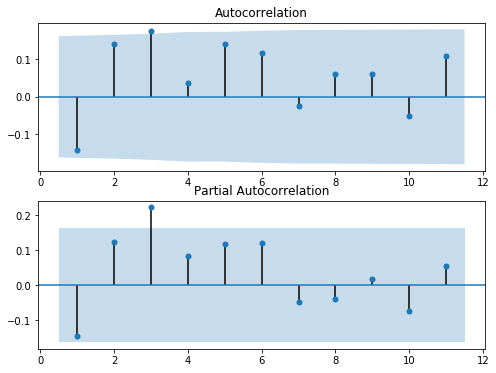

In [84]:
# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=11, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=11, zero=False, ax=ax2)

plt.show();

- Make a list of the first 5 seasonal lags and assign the result to lags.
- Plot the ACF and PACF of aus_employment_diff for the first 5 seasonal lags.

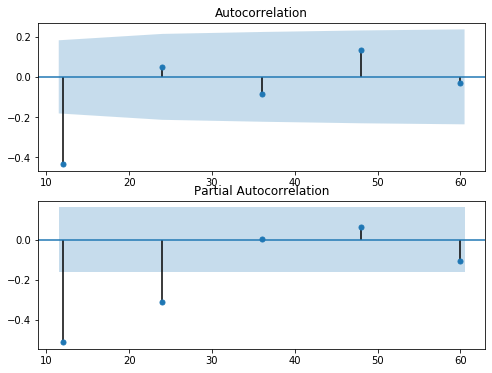

In [85]:
# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=lags, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=lags, zero=False, ax=ax2)

plt.show();

## Question

Based on the ACF and PACF plots, which of these models is most likely for the data?

Possible Answers
- SARIMAX(3,0,0)(0,0,1)$_{12}$
- SARIMAX(0,1,0)(0,1,1)$_{12}$ correct
- SARIMAX(3,1,0)(0,1,0)$_{12}$
- SARIMAX(0,1,0)(1,1,0)$_{12}$
- SARIMAX(0,0,0)(0,1,1)$_{4}$

Remember that to create these plots we took both the seasonal difference and the non-seasonal difference, so this should be included in the model order parameters d and D.

The non-seasonal ACF doesn't show any of the usual patterns of MA, AR or ARMA models so we choose none of these. The Seaosnal ACF and PACF look like an MA(1) model. We select the model that combines both of these.

## SARIMA vs ARIMA forecasts

In this exercise, you will see the effect of using a SARIMA model instead of an ARIMA model on your forecasts of seasonal time series.

Two models, an ARIMA(3,1,2) and a SARIMA(0,1,1)(1,1,1)$_{12}$, have been fit to the Wisconsin employment time series. These were the best ARIMA model and the best SARIMA model available according to the AIC.

In the exercise you will use these two models to make dynamic future forecast for 25 months and plot these predictions alongside held out data for this period, `wisconsin_test`.

The fitted ARIMA results object and the fitted SARIMA results object are available in your environment as `arima_results` and `sarima_results`.

- Create a forecast object, called arima_pred, for the ARIMA model to forecast the next 25 steps after the end of the training data.
- Extract the mean forecast prediction from arima_pred and assign it to arima_mean.
- Repeat the above two steps for the SARIMA model.
- Plot the SARIMA and ARIMA forecasts and the held out data wisconsin_test.

In [86]:
wisconsin_test = pd.read_csv(path+'wisconsin_test.csv', 
            index_col='date',
            parse_dates=True)
wisconsin_test.head()

,number_in_employment
date,
1973-10-01,374.5
1973-11-01,380.2
1973-12-01,384.6
1974-01-01,360.6
1974-02-01,354.4


In [87]:
model1 = SARIMAX(wisconsin_test, order=(3,2,1))
arima_results = model1.fit()
print(arima_results.summary())

                            Statespace Model Results                            
Dep. Variable:     number_in_employment   No. Observations:                   25
Model:                 SARIMAX(3, 2, 1)   Log Likelihood                 -80.579
Date:                  Wed, 25 Dec 2019   AIC                            171.157
Time:                          14:02:00   BIC                            176.835
Sample:                      10-01-1973   HQIC                           172.585
                           - 10-01-1975                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2043      0.358      0.570      0.568      -0.498       0.906
ar.L2         -0.1182      0.329     -0.360      0.719      -0.762       0.526
ar.L3         -0.3508      0.393    

/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [88]:
model2 = SARIMAX(wisconsin_test, order=(0,1,1), seaasonal_order=(1,1,1,12))
sarima_results = model2.fit()
print(sarima_results.summary())

/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                            Statespace Model Results                            
Dep. Variable:     number_in_employment   No. Observations:                   25
Model:                 SARIMAX(0, 1, 1)   Log Likelihood                 -83.654
Date:                  Wed, 25 Dec 2019   AIC                            171.307
Time:                          14:02:00   BIC                            173.664
Sample:                      10-01-1973   HQIC                           171.932
                           - 10-01-1975                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2824      0.554      0.510      0.610      -0.803       1.368
sigma2        62.1673     11.516      5.398      0.000      39.596      84.739
Ljung-Box (Q):                      

In [89]:
dates = np.array(['1973-10-01T00:00:00.000000000', '1973-11-01T00:00:00.000000000',
       '1973-12-01T00:00:00.000000000', '1974-01-01T00:00:00.000000000',
       '1974-02-01T00:00:00.000000000', '1974-03-01T00:00:00.000000000',
       '1974-04-01T00:00:00.000000000', '1974-05-01T00:00:00.000000000',
       '1974-06-01T00:00:00.000000000', '1974-07-01T00:00:00.000000000',
       '1974-08-01T00:00:00.000000000', '1974-09-01T00:00:00.000000000',
       '1974-10-01T00:00:00.000000000', '1974-11-01T00:00:00.000000000',
       '1974-12-01T00:00:00.000000000', '1975-01-01T00:00:00.000000000',
       '1975-02-01T00:00:00.000000000', '1975-03-01T00:00:00.000000000',
       '1975-04-01T00:00:00.000000000', '1975-05-01T00:00:00.000000000',
       '1975-06-01T00:00:00.000000000', '1975-07-01T00:00:00.000000000',
       '1975-08-01T00:00:00.000000000', '1975-09-01T00:00:00.000000000',
       '1975-10-01T00:00:00.000000000'], dtype='datetime64[ns]')

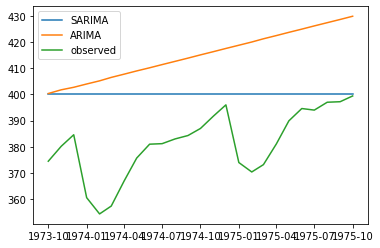

In [90]:
# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(steps=25)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(steps=25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(dates, arima_mean, label='ARIMA')
plt.plot(wisconsin_test, label='observed')
plt.legend()
plt.show();

powinno byc:

<img src="images/ts3_098.png" alt="" style="width: 400px;"/>

You can see that the SARIMA model has forecast the upward trend and the seasonal cycle, whilst the ARIMA model has only forecast the upward trend with an added wiggle. This makes the SARIMA forecast much closer to the truth for this seasonal data!

---
<a id='auto'></a>

## Automation and saving

<img src="images/ts3_099.png" alt="" style="width: 800px;"/>

<img src="images/ts3_100.png" alt="" style="width: 800px;"/>

<img src="images/ts3_101.png" alt="" style="width: 800px;"/>

<img src="images/ts3_102.png" alt="" style="width: 800px;"/>

<img src="images/ts3_103.png" alt="" style="width: 800px;"/>

<img src="images/ts3_104.png" alt="" style="width: 800px;"/>

<img src="images/ts3_105.png" alt="" style="width: 800px;"/>

<img src="images/ts3_106.png" alt="" style="width: 800px;"/>

<img src="images/ts3_107.png" alt="" style="width: 800px;"/>

## Automated model selection

The `pmdarima` package is a powerful tool to help you choose the model orders. You can use the information you already have from the identification step to narrow down the model orders which you choose by automation.

Remember, `although automation is powerful, it can sometimes make mistakes that you wouldn't`. It is hard to guess how the input data could be imperfect and affect the test scores.

In this exercise you will use the `pmdarima` package to automatically choose model orders for some time series datasets.

[https://alkaline-ml.com/pmdarima/](https://alkaline-ml.com/pmdarima/)

Three datasets are available in your environment as `df1`, `df2` and `df3`.

In [91]:
df1 = pd.read_csv(path+'df10.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
df1.head()

,Y
2013-01-01,1111.611587
2013-01-02,-982.423329
2013-01-03,-134.668088
2013-01-04,-205.141545
2013-01-05,177.895526


In [107]:
#!pip install -U scipy
#!pip install -U scikit-learn
#!pip install pmdarima
#!conda install scikit-learn
#!pip install -U cython

# there is a problem installing pmdarima with python 3.7 (cython)

In [108]:
# Import pmdarima as pm
import pmdarima as pm

ImportError: cannot import name 'get_config' from 'sklearn' (unknown location)

- Model the time series df1 with period 7 days and set first order seasonal differencing and no non-seasonal differencing.

In [109]:
# Create auto_arima model
model1 = pm.auto_arima(df1,
                      seasonal=True, m=7,
                      d=0, D=1, 
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())

NameError: name 'pm' is not defined

- Create a model to fit df2. Set the non-seasonal differencing to 1, the trend to a constant and set no seasonality.

In [110]:
df2 = pd.read_csv(path+'df11.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
df2.head()

,Y
2013-01-01,287.034704
2013-01-02,110.595682
2013-01-03,305.703744
2013-01-04,322.875181
2013-01-05,581.451700


In [ ]:
# Create model
model2 = pm.auto_arima(df2,
                      seasonal=False, trend='c',
                      d=1, D=1,
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model2.summary())

- Fit a SARIMAX(p,1,q)(P,1,Q)7 model to the data setting start_p, start_q, max_p, max_q, max_P and max_Q to 1.

In [111]:
df3 = pd.read_csv(path+'df12.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
df3.head()

,Y
2013-01-01,1508.548700
2013-01-02,-130.934198
2013-01-03,499.466426
2013-01-04,1125.074726
2013-01-05,-221.101356


In [ ]:
# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df3,
                      seasonal=True, m=7,
                      d=1, D=1, 
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model3.summary())

We use the information we already know about the time series to predefine some of the orders before we fit. Automating the choice of orders can speed us up, but it needs to be done with care.

## Saving and updating models

Once you have gone through the steps of the Box-Jenkins method and arrived at a model you are happy with, you will want to be able to save that model and also to incorporate new measurements when they are available. This is key part of putting the model into production.

In this exercise you will save a freshly trained model to disk, then reload it to update it with new data.

The model is available in your environment as `model`.

- Import the joblib package and use it to save the model to "candy_model.pkl".

In [ ]:
# Import joblib
import joblib

# Set model name
filename = "candy_model.pkl"

# Pickle it
joblib.dump(model,filename)

- Use the joblib package to load the model back in as loaded_model.

In [ ]:
# Import
import joblib

# Set model name
filename = "candy_model.pkl"

# Load the model back in
loaded_model = joblib.load(filename)

- Update the loaded model with the data df_new.

In [ ]:
# Update the model
loaded_model.update(df_new)

You've just updated an old model with new measurements. This means it will make better prediction of the future. The next step might be to make new predictions with this model or save the updated version back to the file.

---
<a id='sbox'></a>

## SARIMA and Box-Jenkins

<img src="images/ts3_108.png" alt="" style="width: 800px;"/> 

<img src="images/ts3_109.png" alt="" style="width: 800px;"/>

<img src="images/ts3_110.png" alt="" style="width: 800px;"/>

<img src="images/ts3_111.png" alt="" style="width: 800px;"/>

<img src="images/ts3_112.png" alt="" style="width: 800px;"/>

## Multiplicative vs additive seasonality

The first thing you need to decide is whether to apply transformations to the time series. In these last few exercises you will be working towards making a forecast of the CO2 time series. This and another time series for electricity production are plotted below.

<img src="images/ts3_113.png" alt="" style="width: 800px;"/>

Which of the above time series, if either, should be log transformed?

Possible Answers
- Left plot: CO2 concentration.
- Right plot: Electricity production. (correct)
- None.
- Both.

Multiplicative seasonality is fairly common, and is important to be able to identify. You don't see it in the CO2 time series, so you won't apply the transform this time.

## SARIMA model diagnostics

Usually the next step would be to find the order of differencing and other model orders. However, this time it's already been done for you. The time series is best fit by a SARIMA(1, 1, 1)(0, 1, 1)$_{12}$ model with an added constant.

In this exercise you will make sure that this is a good model by first fitting it using the SARIMAX class and going through the normal model diagnostics procedure.

The DataFrame, `co2`, and the SARIMAX model class are available in your environment.

In [112]:
co2 = pd.read_csv(path+'co22.csv', 
            index_col='date',
            parse_dates=True)
co2.head()

,CO2_ppm
date,
1990-01-01,353.80
1990-02-01,355.04
1990-03-01,355.73
1990-04-01,356.32
1990-05-01,357.32


- Fit a SARIMA(1, 1, 1)(0, 1, 1)$_{12}$ model to the data and set the trend to constant.

In [113]:
# Import model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create model object
model = SARIMAX(co2, 
                order=(1,1,1), 
                seasonal_order=(0,1,1,12), 
                trend='c')
# Fit model
results = model.fit()

/Users/ksatola/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [114]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                            CO2_ppm   No. Observations:                  345
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -100.994
Date:                            Wed, 25 Dec 2019   AIC                            211.988
Time:                                    16:08:10   BIC                            231.013
Sample:                                01-01-1990   HQIC                           219.575
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0027      0.001      3.056      0.002       0.001       0.005
ar.L1          0.2351      0.110   

## Question

In the console, print the summary of the results object you just created. Is there anything wrong with this model?

Possible Answers
- The residuals are correlated. (Prob(Q) is greater than 0.05 so the residuals don't seem correlated.)
- The residuals are not normally distributed. (Prob(JB) is greater than 0.05 so the residuals aren't significantly difference from normal.)
- Both of the above.
- None of the above. (correct)

In [ ]:
<img src="images/ts3_114.png" alt="" style="width: 800px;"/>

In [ ]:
---
<a id='intro'></a>